In [91]:
import string, re, json, pickle, warnings, random, nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_preparation import take_a_shower, clean_content_aravec, is_emoji

In [2]:
data = pd.read_csv('./data/data_v1.csv', encoding="utf-16")
data = data.drop('Username', axis =1)

In [3]:
data.head()

,Comment,is_off,off_word
0,Comment,0,0
1,هادك المجرم لي قتل الطفل عدنان خصو لاعدام,1,"0, المجرم, قتل, لاعدام"
2,أي واحد دارلي ابوني الله يفتح عليه بيبان الخير...,0,0
3,الطفل عدنان الله يرحمو ولكن لن يرتاح عدنان...,1,"0, اعدام, المجرم"
4,الله يرحم طفل عدنان وهاد لمجرمين ومغتصبين الله...,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37607 entries, 0 to 37606
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comment   37607 non-null  object
 1   is_off    37607 non-null  int64 
 2   off_word  37607 non-null  object
dtypes: int64(1), object(2)
memory usage: 881.5+ KB


<AxesSubplot:xlabel='is_off', ylabel='count'>

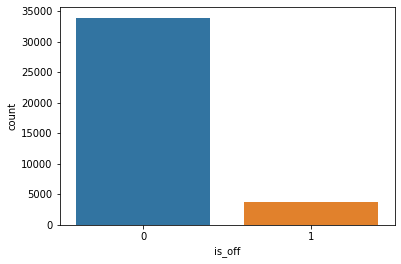

In [5]:
sns.countplot(x='is_off', data=data)

In [6]:
print('number of samplse offensive class: {}'.format(sum(data.is_off)))
print('number of samplse non-offensive class: {}'.format(len(data.is_off)-sum(data.is_off)))

number of samplse offensive class: 3701
number of samplse non-offensive class: 33906


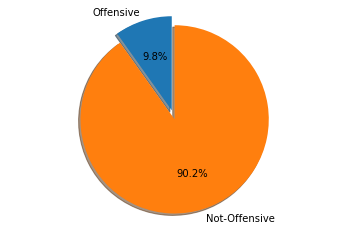

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Offensive', 'Not-Offensive'
sizes = [sum(data.is_off), len(data.is_off)-sum(data.is_off)]
explode = (0, 0.1)  # only "explode" the 2nd slice data.is_offi.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
data.Comment = data.Comment.apply(take_a_shower)

In [9]:
comments = ' '.join(list(data.Comment))
comments[0:100]

' هادك المجرم قتل الطفل عدنان خصو لاعدام دارلي ابوني الله يفتح بيبان الخير والسعاده يارب العالمين الط'

In [10]:
words = comments.split(' ')

In [11]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

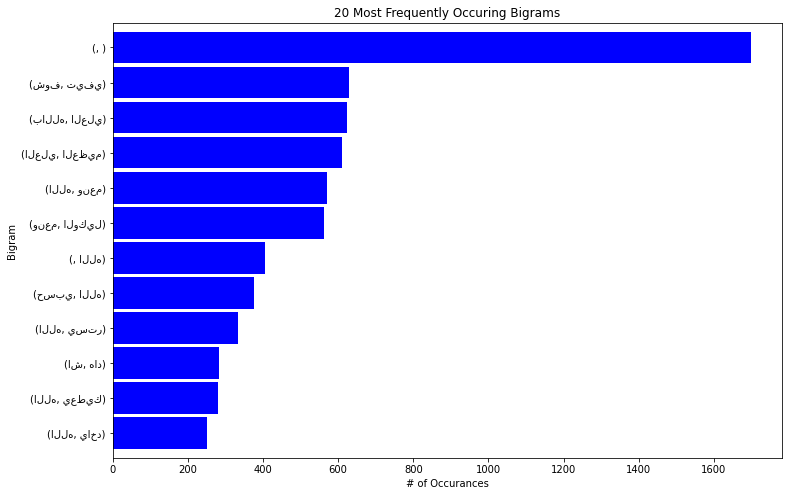

In [12]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [13]:
from collections import Counter

aggregate_counter = Counter()
for row_index,row in data.iterrows():
    c = Counter(row['Comment'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]
from itertools import islice

In [14]:
import arabic_reshaper
from bidi.algorithm import get_display
x = [ ]

for item in common_words:
    x.append(get_display(arabic_reshaper.reshape(item)))

In [15]:
def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

In [ ]:
x

/media/mo3az/Data/Codes/arabic-offensive-language-detection/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/media/mo3az/Data/Codes/arabic-offensive-language-detection/env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


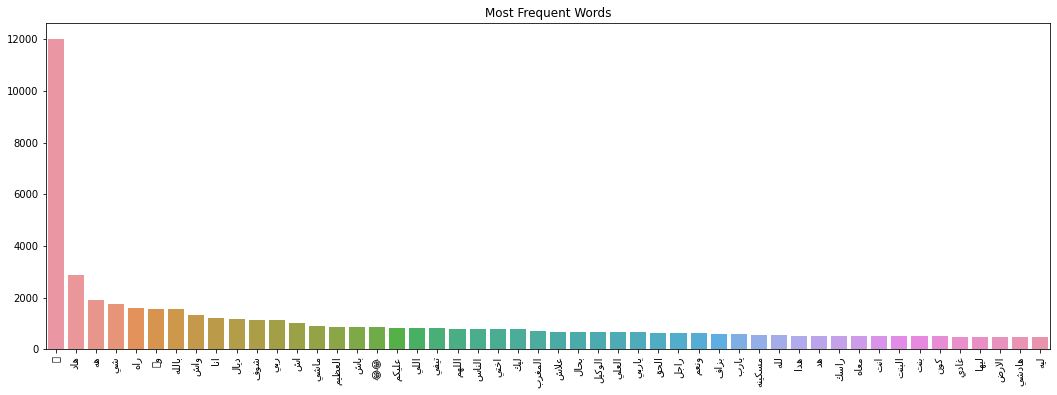

In [16]:
barplot(words=x, words_counts=common_words_counts, title='Most Frequent Words')

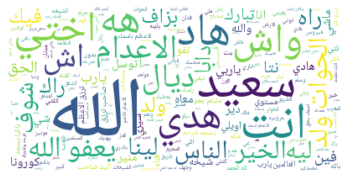

In [53]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
y=TreebankWordDetokenizer().detokenize(x)
from wordcloud import WordCloud 
wordcloud = WordCloud(font_path="assets/NotoNaskhArabic-Regular.ttf", background_color="white",).generate(y)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [87]:
offensive_data = data.loc[data['is_off'] == 1.0]
print(len(offensive_data))
offensive_text = ' '.join(list(offensive_data.Comment))
print(offensive_text[0:100])
offensive_words = comments.split(' ')
print(len(offensive_words))

3701
هادك المجرم قتل الطفل عدنان خصو لاعدام الطفل عدنان الله يرحمو يرتاح عدنان ولن يرتاح المغاربه اعدام ا
322562


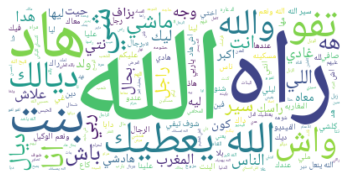

In [88]:
# handling arabic text
offensive_text = arabic_reshaper.reshape(removeWeirdChars(offensive_text))
offensive_text = get_display(offensive_text)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
#                       max_words=1000,
                      mode='RGBA').generate(offensive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
not_offensive_data = data.loc[data['is_off'] == 0]
print(len(not_offensive_data))
not_offensive_text = ' '.join(list(not_offensive_data.Comment))
print(not_offensive_text[0:100])
not_offensive_words = comments.split(' ')
print(len(not_offensive_words))

33906
 دارلي ابوني الله يفتح بيبان الخير والسعاده يارب العالمين الله يرحم طفل عدنان وهاد لمجرمين ومغتصبين 
322562


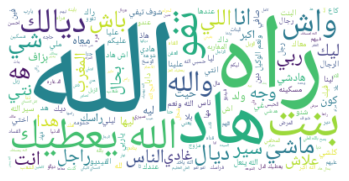

In [90]:
# handling arabic text
not_offensive_text = arabic_reshaper.reshape(removeWeirdChars(not_offensive_text))
not_offensive_text = get_display(not_offensive_text)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
#                       max_words=1000,
                      mode='RGBA').generate(offensive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [107]:
offensive_data = data.loc[data['is_off'] == 1.0]
print(len(offensive_data))
offensive_text = ' '.join(list(offensive_data.Comment))

3701


In [108]:
from collections import Counter

off_emojo_counter = Counter()
for row_index,row in data.iterrows():
    c = Counter(row['Comment'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]
from itertools import islice

In [ ]:
off_emojo_counter = Counter()
s = ' 😊🙏ﻢﻜﺗﺪﻋﺎﺴﻣ'
for char in offensive_text:
    if is_emoji(char):
        c = Counter(char)
        off_emojo_counter += c

In [110]:
common_words = [word[0] for word in off_emojo_counter.most_common(50)]
common_words_counts = [word[1] for word in off_emojo_counter.most_common(50)]

In [111]:
common_words

['😂',
 '🏻',
 '😍',
 '♀',
 '👎',
 '👏',
 '👩',
 '🥰',
 '🤣',
 '👨',
 '🤲',
 '👧',
 '💪',
 '😱',
 '🤔',
 '🤑',
 '💃',
 '❤',
 '😢',
 '🙏',
 '😅',
 '😭',
 '🏽',
 '😔',
 '🧏',
 '💄',
 '💅',
 '🏠',
 '👦',
 '🌹',
 '😏',
 '👍',
 '😥',
 '😒',
 '😳',
 '😘',
 '😠',
 '🤮',
 '🤦',
 '💩',
 '🏃',
 '😡',
 '🤩',
 '💔',
 '👇',
 '🇩',
 '🙄',
 '🖕',
 '💞',
 '💖']

In [112]:
common_words_counts

[171,
 98,
 56,
 45,
 44,
 38,
 36,
 36,
 36,
 35,
 35,
 34,
 32,
 30,
 28,
 24,
 24,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 9,
 9,
 8]

In [113]:
not_offensive_data = data.loc[data['is_off'] == 0]
print(len(not_offensive_data))
not_offensive_text = ' '.join(list(not_offensive_data.Comment))

33906


In [114]:
off_emojo_counter = Counter()
for char in not_offensive_text:
    if is_emoji(char):
        c = Counter(char)
        off_emojo_counter += c

In [115]:
common_words = [word[0] for word in off_emojo_counter.most_common(50)]
common_words_counts = [word[1] for word in off_emojo_counter.most_common(50)]

In [117]:
common_words_counts

[2868,
 872,
 556,
 540,
 379,
 357,
 314,
 247,
 239,
 192,
 189,
 177,
 167,
 162,
 156,
 150,
 136,
 133,
 127,
 123,
 122,
 122,
 120,
 117,
 113,
 112,
 107,
 105,
 104,
 95,
 88,
 76,
 76,
 72,
 72,
 67,
 65,
 61,
 60,
 58,
 57,
 52,
 52,
 51,
 51,
 50,
 49,
 48,
 48,
 47]

In [116]:
common_words

['😂',
 '🤣',
 '😭',
 '❤',
 '👍',
 '😢',
 '🤲',
 '😍',
 '🙏',
 '😅',
 '🤔',
 '🇦',
 '😱',
 '🇲',
 '🤮',
 '😁',
 '😥',
 '😘',
 '😔',
 '🇩',
 '🇿',
 '💔',
 '🏻',
 '😡',
 '🤦',
 '👏',
 '👎',
 '♥',
 '✌',
 '🙄',
 '😠',
 '🌹',
 '♀',
 '👌',
 '😒',
 '🔥',
 '😳',
 '😑',
 '🏼',
 '🙂',
 '💕',
 '😉',
 '💖',
 '😓',
 '😆',
 '😊',
 '😏',
 '🤗',
 '🤢',
 '😤']

In [93]:
is_emoji(' 😊🙏ﻢﻜﺗﺪﻋﺎﺴﻣ')

False

In [95]:
is_emoji('🙏')

True

In [74]:
def removeWeirdChars(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weridPatterns.sub(r'', text)

In [75]:
removeWeirdChars('تتنمتمن نتمنتمتنمkjljl lkjlkjl ljkjlkنتمنتم')

'تتنمتمن نتمنتمتنمkjljl lkjlkjl ljkjlkنتمنتم'